#  Practical Data Preprocessing Task – Sales Dataset

##  Task Title:
**"Will This Sale Be Successful?"**

##  Objective:
You are provided with a real-world retail dataset. Your task is to **prepare the data for a machine learning classification model** that predicts whether a customer will purchase **more than 3 items in a single transaction**.

You will perform a complete preprocessing pipeline from data exploration to handling imbalances, with visualizations and clear justifications for each step.

---

##  Dataset Description:

Dataset link: [Customer Shopping Dataset – Retail Sales Data](https://www.kaggle.com/datasets/mehmettahiraslan/customer-shopping-dataset)

The dataset contains sales transactions from a retail environment with the following columns:

| Column Name       | Description                                                              |
|------------------|---------------------------------------------------------------------------|
| `invoice_no`      | Unique identifier for the invoice                                         |
| `customer_id`     | Unique identifier for each customer                                       |
| `gender`          | Gender of the customer (`Male`, `Female`)                                |
| `age`             | Age of the customer                                                      |
| `category`        | Category of the purchased product                                        |
| `quantity`        | Number of items purchased in the transaction                            |
| `price`           | Unit price of the product in Turkish Lira                                |
| `payment_method`  | Payment method used (e.g., `Cash`, `Credit Card`, `Debit Card`)         |
| `invoice_date`    | Date of the transaction                                                  |
| `shopping_mall`   | Name of the mall where the transaction occurred                         |

---

##  Task Instructions:

You must complete the following steps **in order**, and write clear explanations (in Markdown cells) alongside your code in a Jupyter Notebook.

### 1. Load & Explore the Data
- Load the dataset.
- Display first few rows and general information.
- Summary statistics of numerical and categorical features.
- Visualizations:
  - Histogram of `age`, `price`, and `quantity`.
  - Countplot for `gender`, `category`, and `payment_method`.

---

### 2. Clean the Data
- Remove duplicate records if any.
- Identify and remove/fix unrealistic values (e.g., negative or 0 prices, age outliers).
- Provide a rationale for cleaning decisions.

---

### 3. Handle Missing Data
- Check for missing values.
- Apply at least two different strategies to handle missing data:
  - Drop
  - Fill (e.g., with median, mode, etc.)
- Justify why each method was chosen.

---

### 4. Feature Engineering
- Create a new column: `total_spent = quantity * price`
- Create a new binary target column:
  - 1 if `quantity > 3`, otherwise 0
  - Name the new column `target`

---

### 5. Encode Categorical Variables
- Encode all applicable categorical features using suitable encoding techniques.
- Explain your choice (e.g., Label Encoding vs OneHot Encoding).

---

### 6. Detect & Handle Outliers
- Use visualizations (e.g., boxplots) to detect outliers in numerical columns like `age`, `price`, and `total_spent`.
- Apply IQR or another statistical method to handle outliers.

---

### 7. Feature Scaling
- Apply feature scaling to numerical columns like `age`, `price`, and `total_spent`.
- Use either `StandardScaler` or `MinMaxScaler`.
- Show distributions before and after scaling.

---

### 8. Train-Test Split
- Split the data into training and testing sets (80/20).
- Use `stratify=y` to preserve class distribution.

---

### 9. Deal with Imbalanced Classes
- Check class distribution of your `target` variable.
- If imbalanced, apply resampling techniques:
  - Random UnderSampling or SMOTE
- Show class distribution before and after resampling.

---
    
## Deliverables:
At the end of the session, you should submit:
- A complete Jupyter Notebook with:
  - Well-structured code
  - Clear explanations using Markdown
  - Visualizations embedded
- A short reflection answering:
  - What challenges did you face?
  - What did you learn from this task?
  - What would you do differently if the dataset was larger/messier?

---

## Hints:
- Clean code is important! Keep your notebook readable.
- Justify your preprocessing decisions.
- Label your visualizations properly.

---

> **Good luck! This is your chance to practice real-world data preparation and analysis.**


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r"C:\Users\esraa\Downloads\archive (1)\csv\customer_shopping_data.csv"

df = pd.read_csv(file_path)
print(df.head())

print(df.info())

print(df.describe())

print(df.describe(include='object'))


  invoice_no customer_id  gender  age  category  quantity    price  \
0    I138884     C241288  Female   28  Clothing         5  1500.40   
1    I317333     C111565    Male   21     Shoes         3  1800.51   
2    I127801     C266599    Male   20  Clothing         1   300.08   
3    I173702     C988172  Female   66     Shoes         5  3000.85   
4    I337046     C189076  Female   53     Books         4    60.60   

  payment_method invoice_date   shopping_mall  
0    Credit Card     5/8/2022          Kanyon  
1     Debit Card   12/12/2021  Forum Istanbul  
2           Cash    9/11/2021       Metrocity  
3    Credit Card   16/05/2021    Metropol AVM  
4           Cash   24/10/2021          Kanyon  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2

In [5]:

numeric_summary = df.describe()
print("Numeric Summary Statistics:\n", numeric_summary)

categorical_summary = df.describe(include='object')
print("\nCategorical Summary Statistics:\n", categorical_summary)


Numeric Summary Statistics:
                 age      quantity         price
count  99457.000000  99457.000000  99457.000000
mean      43.427089      3.003429    689.256321
std       14.990054      1.413025    941.184567
min       18.000000      1.000000      5.230000
25%       30.000000      2.000000     45.450000
50%       43.000000      3.000000    203.300000
75%       56.000000      4.000000   1200.320000
max       69.000000      5.000000   5250.000000

Categorical Summary Statistics:
        invoice_no customer_id  gender  category payment_method invoice_date  \
count       99457       99457   99457     99457          99457        99457   
unique      99457       99457       2         8              3          797   
top       I232867     C273973  Female  Clothing           Cash   24/11/2021   
freq            1           1   59482     34487          44447          159   

           shopping_mall  
count              99457  
unique                10  
top     Mall of Istanbul  
f

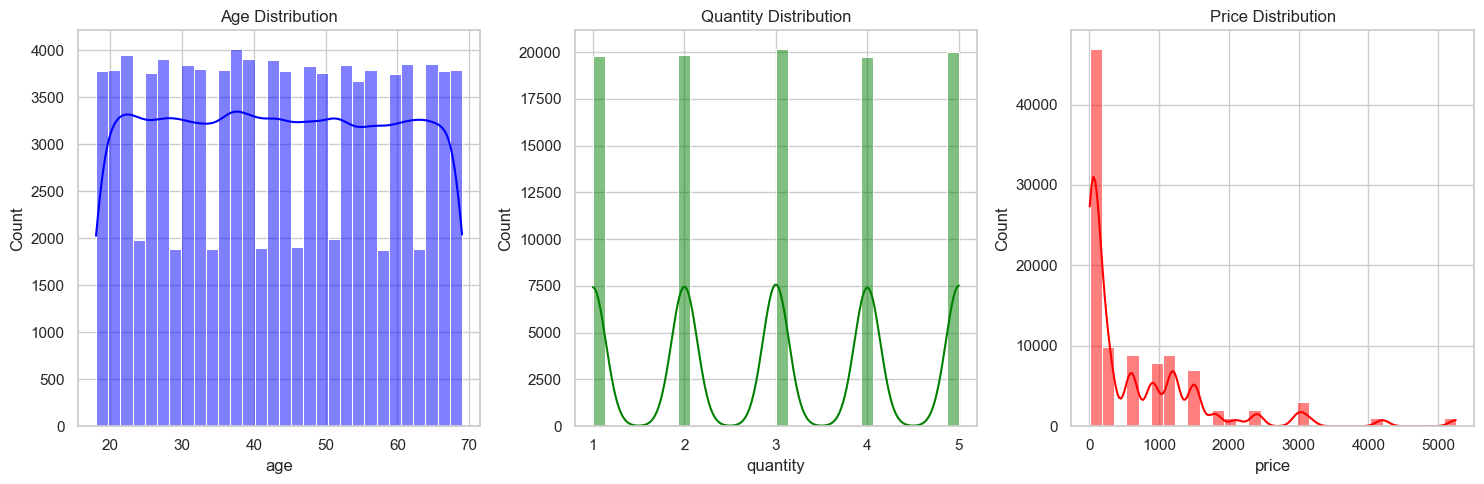

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.histplot(df['age'], bins=30, kde=True, color='blue')
plt.title("Age Distribution")

plt.subplot(1,3,2)
sns.histplot(df['quantity'], bins=30, kde=True, color='green')
plt.title("Quantity Distribution")

plt.subplot(1,3,3)
sns.histplot(df['price'], bins=30, kde=True, color='red')
plt.title("Price Distribution")

plt.tight_layout()
plt.show()


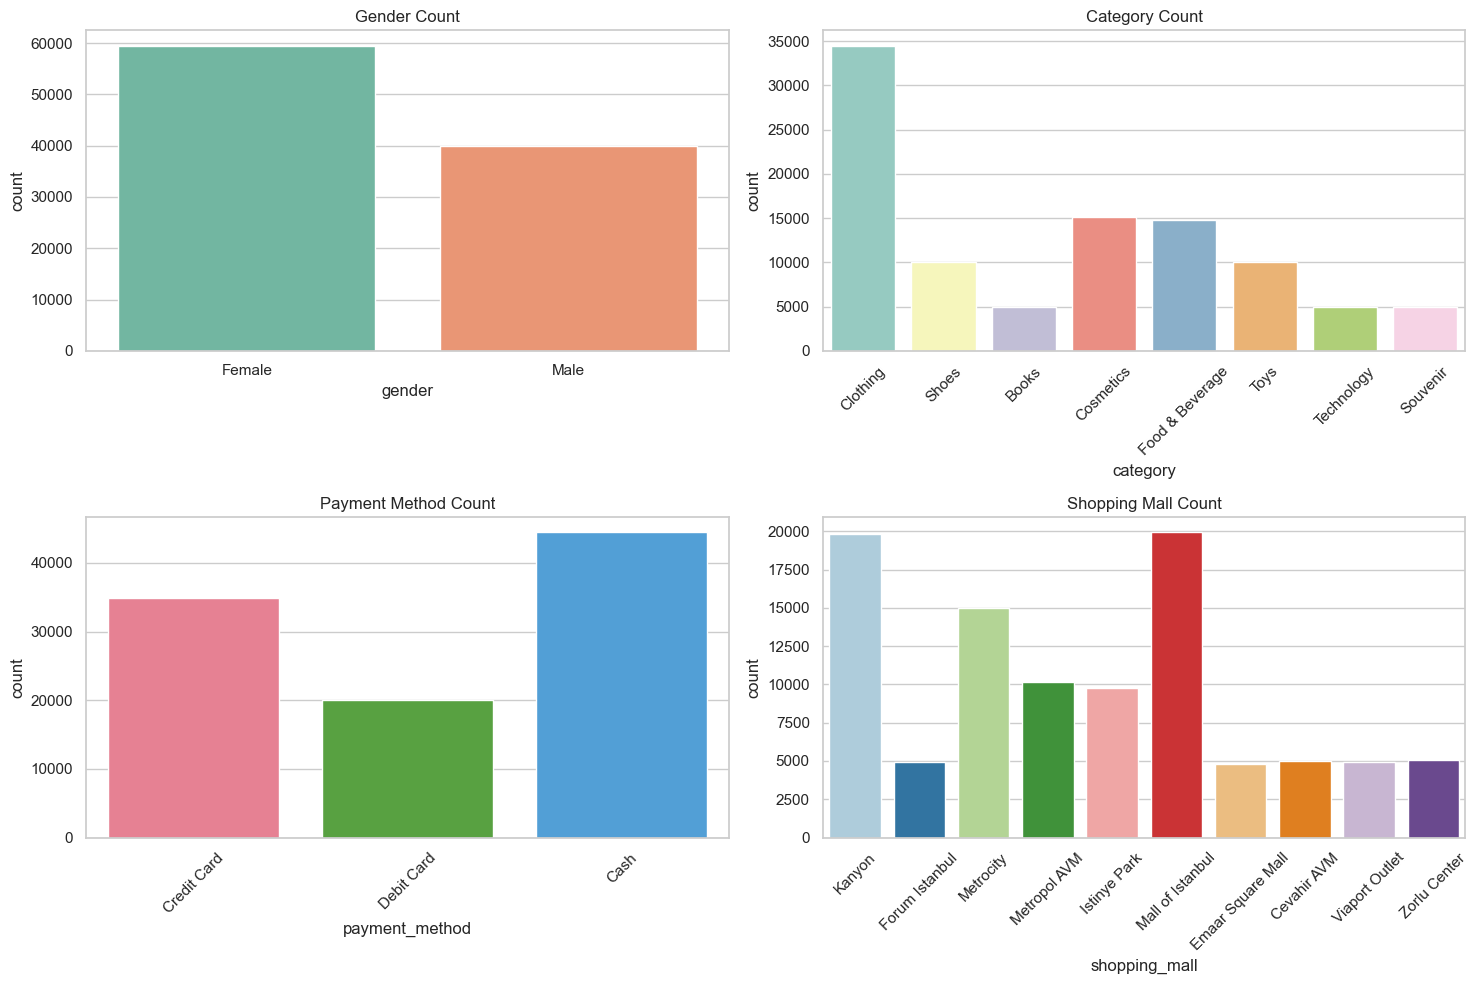

In [20]:

plt.figure(figsize=(15,10))

# Gender
plt.subplot(2,2,1)
sns.countplot(x='gender', hue='gender', data=df, palette="Set2", legend=False)
plt.title("Gender Count")

# Category
plt.subplot(2,2,2)
sns.countplot(x='category', hue='category', data=df, palette="Set3", legend=False)
plt.title("Category Count")
plt.xticks(rotation=45)

# Payment Method
plt.subplot(2,2,3)
sns.countplot(x='payment_method', hue='payment_method', data=df, palette="husl", legend=False)
plt.title("Payment Method Count")
plt.xticks(rotation=45)

# Shopping Mall
plt.subplot(2,2,4)
sns.countplot(x='shopping_mall', hue='shopping_mall', data=df, palette="Paired", legend=False)
plt.title("Shopping Mall Count")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [21]:
# 1. Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# 2. Drop duplicates if any
print("\nBefore removing duplicates:", df.shape)
df = df.drop_duplicates()
print("After removing duplicates:", df.shape)

# 3. Check data types
print("\nData types before conversion:")
print(df.dtypes)

# 4. Convert 'invoice_date' to datetime
df['invoice_date'] = pd.to_datetime(df['invoice_date'], errors='coerce')

# 5. Handle invalid ages (e.g., negative or very high values)
df = df[(df['age'] > 0) & (df['age'] < 100)]

# 6. Reset index after cleaning
df.reset_index(drop=True, inplace=True)

# 7. Show final info
print("\nData after cleaning:")
print(df.info())



Missing values per column:
invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
total_spent       0
target            0
dtype: int64

Before removing duplicates: (99457, 12)
After removing duplicates: (99457, 12)

Data types before conversion:
invoice_no         object
customer_id        object
gender             object
age                 int64
category           object
quantity            int64
price             float64
payment_method     object
invoice_date       object
shopping_mall      object
total_spent       float64
target              int64
dtype: object

Data after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object     

In [23]:
# 1. Check missing values
print("Missing values per column before handling:")
print(df.isnull().sum())

# 2. Handle missing values with imputation
# Fill age with median
if df['age'].isnull().sum() > 0:
    df['age'] = df['age'].fillna(df['age'].median())

# Fill gender with mode
if df['gender'].isnull().sum() > 0:
    df['gender'] = df['gender'].fillna(df['gender'].mode()[0])

# Fill price with mean
if df['price'].isnull().sum() > 0:
    df['price'] = df['price'].fillna(df['price'].mean())

# Fill payment_method with mode
if df['payment_method'].isnull().sum() > 0:
    df['payment_method'] = df['payment_method'].fillna(df['payment_method'].mode()[0])

# 3. Verify again
print("\nMissing values per column after handling:")
print(df.isnull().sum())



Missing values per column before handling:
invoice_no            0
customer_id           0
gender                0
age                   0
category              0
quantity              0
price                 0
payment_method        0
invoice_date      59428
shopping_mall         0
total_spent           0
target                0
dtype: int64

Missing values per column after handling:
invoice_no            0
customer_id           0
gender                0
age                   0
category              0
quantity              0
price                 0
payment_method        0
invoice_date      59428
shopping_mall         0
total_spent           0
target                0
dtype: int64


In [24]:
# 1. Create total_spent column
df['total_spent'] = df['quantity'] * df['price']

# 2. Create binary target column
df['target'] = df['quantity'].apply(lambda x: 1 if x > 3 else 0)

# 3. Check new columns
print(df[['quantity', 'price', 'total_spent', 'target']].head())

print(df.info())

   quantity    price  total_spent  target
0         5  1500.40      7502.00       1
1         3  1800.51      5401.53       0
2         1   300.08       300.08       0
3         5  3000.85     15004.25       1
4         4    60.60       242.40       1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  object        
 3   age             99457 non-null  int64         
 4   category        99457 non-null  object        
 5   quantity        99457 non-null  int64         
 6   price           99457 non-null  float64       
 7   payment_method  99457 non-null  object        
 8   invoice_date    40029 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  object        
 10  total_spen

In [41]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# --- Load Data ---
file_path = r"C:\Users\esraa\Downloads\archive (1)\csv\customer_shopping_data.csv"
df = pd.read_csv(file_path)

print("Initial Dataframe Info:")
print(df.info())

# --- Label Encoding ---
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['payment_method'] = le.fit_transform(df['payment_method'])

# --- One-Hot Encoding ---
df = pd.get_dummies(df, columns=['category'], drop_first=True)

print("\n Dataframe Info after Encoding:")
print(df.info())
print(df.head())

# --- Descriptive Stats ---
print("\n Descriptive Statistics after Encoding:")
print(df.describe())


Initial Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB
None

 Dataframe Info after Encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   inv

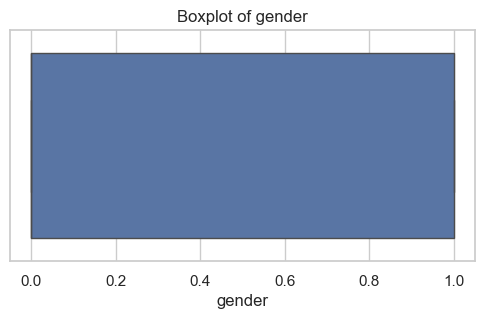

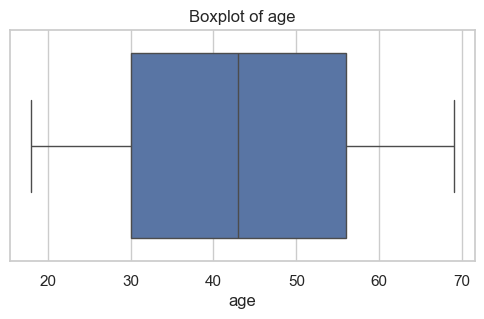

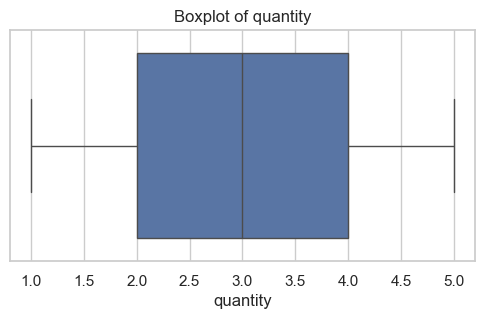

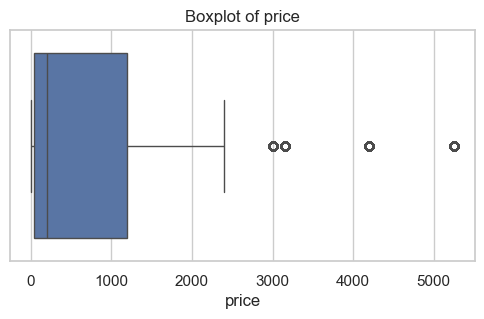

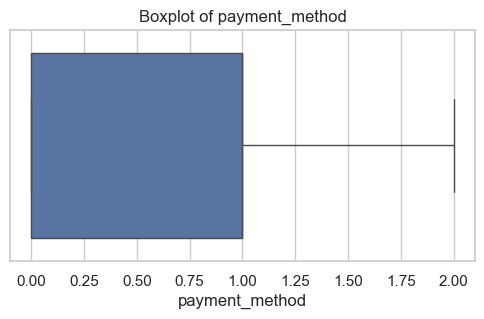


Number of outliers in each column:
gender               0
age                  0
quantity             0
price             5024
payment_method       0
dtype: int64

Outliers have been handled.
Final dataset shape: (99457, 16)


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Select numerical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# 2. Plot Boxplots to visualize outliers
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# 3. Calculate IQR for outlier detection
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Detect outliers
outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR)))

print("\nNumber of outliers in each column:")
print(outliers.sum())

# 4. Handle outliers
# Option A: Remove rows with outliers
df_no_outliers = df[~outliers.any(axis=1)]

# Option B: Cap outliers (Winsorization)
for col in numeric_cols:
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    df[col] = np.where(df[col] < lower_bound, lower_bound,
                       np.where(df[col] > upper_bound, upper_bound, df[col]))

print("\nOutliers have been handled.")
print("Final dataset shape:", df.shape)




In [53]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv(r"C:\Users\esraa\Downloads\archive (1)\csv\customer_shopping_data.csv")

# Label encoding
for col in ['gender', 'payment_method']:
    df[col] = LabelEncoder().fit_transform(df[col])

# Feature engineering
df['total_spent'] = df['price'] * df['quantity']

# One-Hot Encoding
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), ['category'])],
    remainder='passthrough'
)
df_transformed = ct.fit_transform(df)

# Create DataFrame safely
one_hot_cols = ct.named_transformers_['encoder'].get_feature_names_out(['category'])
# كل الأعمدة الأخرى بعد One-Hot (numeric + label encoded + total_spent)
other_cols = [col for col in df.columns if col != 'category']
df = pd.DataFrame(df_transformed, columns=list(one_hot_cols) + other_cols)

# Ensure numeric columns are float
numeric_cols = ['age', 'quantity', 'price', 'total_spent']
for col in numeric_cols + ['gender', 'payment_method']:
    df[col] = pd.to_numeric(df[col])

# Feature Scaling
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Check
print(df.head())




  category_Books category_Clothing category_Cosmetics  \
0            0.0               1.0                0.0   
1            0.0               0.0                0.0   
2            0.0               1.0                0.0   
3            0.0               0.0                0.0   
4            1.0               0.0                0.0   

  category_Food & Beverage category_Shoes category_Souvenir  \
0                      0.0            0.0               0.0   
1                      0.0            1.0               0.0   
2                      0.0            0.0               0.0   
3                      0.0            1.0               0.0   
4                      0.0            0.0               0.0   

  category_Technology category_Toys invoice_no customer_id  gender       age  \
0                 0.0           0.0    I138884     C241288       0 -1.029160   
1                 0.0           0.0    I317333     C111565       1 -1.496139   
2                 0.0           0.0   

In [64]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# 1. Load data
file_path = r"C:\Users\esraa\Downloads\archive (1)\csv\customer_shopping_data.csv"
df = pd.read_csv(file_path)

# 2. Label Encoding
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['payment_method'] = le.fit_transform(df['payment_method'])

# 3. One-Hot Encoding for 'category'
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(drop='first'), ['category'])],
    remainder='passthrough'
)
df_array = ct.fit_transform(df)

# 4. Create column names
onehot_cols = ct.named_transformers_['encoder'].get_feature_names_out(['category'])
other_cols = [col for col in df.columns if col != 'category']
all_cols = list(onehot_cols) + other_cols

# 5. Convert to DataFrame
df = pd.DataFrame(df_array, columns=all_cols)

# 6. Feature Engineering: create 'total_spent'
df['total_spent'] = df['price'].astype(float) * df['quantity'].astype(float)

# 7. Scale numeric features
numeric_cols = ['age','quantity','price','total_spent']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols].astype(float))

# 8. Train-Test Split (80/20) with stratify on 'gender'
X = df.drop('gender', axis=1)
y = df['gender']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 9. Print shapes
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)



X_train: (79565, 16)
X_test: (19892, 16)
y_train: (79565,)
y_test: (19892,)


In [66]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Ensure X_train is numeric
X_train_numeric = X_train.copy()
for col in X_train_numeric.columns:
    X_train_numeric[col] = pd.to_numeric(X_train_numeric[col], errors='coerce').fillna(0)

# Ensure y_train is numeric or categorical
y_train_numeric = pd.Series(y_train).astype(int)

# --- Check class distribution before resampling ---
print("Class distribution in training set BEFORE resampling:")
print(y_train_numeric.value_counts())

# --- SMOTE ---
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_numeric, y_train_numeric)

print("\nClass distribution AFTER SMOTE:")
print(pd.Series(y_train_smote).value_counts())

# --- Random Undersampling ---
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train_numeric, y_train_numeric)

print("\nClass distribution AFTER Random Undersampling:")
print(pd.Series(y_train_rus).value_counts())




Class distribution in training set BEFORE resampling:
gender
0    47585
1    31980
Name: count, dtype: int64

Class distribution AFTER SMOTE:
gender
0    47585
1    47585
Name: count, dtype: int64

Class distribution AFTER Random Undersampling:
gender
0    31980
1    31980
Name: count, dtype: int64


In [67]:

from imblearn.over_sampling import SMOTE
import pandas as pd

# Ensure all features are numeric
X_train_numeric = X_train.copy()
for col in X_train_numeric.columns:
    X_train_numeric[col] = pd.to_numeric(X_train_numeric[col], errors='coerce').fillna(0)

# Ensure target is integer
y_train_numeric = y_train.astype(int)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_numeric, y_train_numeric)

# Check new class distribution
print("Class distribution AFTER SMOTE:")
print(pd.Series(y_train_smote).value_counts())



Class distribution AFTER SMOTE:
gender
0    47585
1    47585
Name: count, dtype: int64


In [71]:
# --- Handling Imbalanced Classes with SMOTE and Random UnderSampling ---

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# Ensure all features are numeric
X_train_numeric = X_train.copy()
for col in X_train_numeric.columns:
    X_train_numeric[col] = pd.to_numeric(X_train_numeric[col], errors='coerce').fillna(0)

# Ensure target is integer
y_train_numeric = y_train.astype(int)

# --- SMOTE (Oversampling) ---
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_numeric, y_train_numeric)

print("Class distribution AFTER SMOTE:")
print(pd.Series(y_train_smote).value_counts())

# --- Random UnderSampling ---
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train_numeric, y_train_numeric)

print("\nClass distribution AFTER Random Undersampling:")
print(pd.Series(y_train_rus).value_counts())



Class distribution AFTER SMOTE:
gender
0    47585
1    47585
Name: count, dtype: int64

Class distribution AFTER Random Undersampling:
gender
0    31980
1    31980
Name: count, dtype: int64


In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

# --- 1. Load Data ---
file_path = r"C:\Users\esraa\Downloads\archive (1)\csv\customer_shopping_data.csv"
df = pd.read_csv(file_path)

# --- 2. Feature Engineering ---
# Create target column: 1 if quantity > 3 else 0
df['target'] = (df['quantity'] > 3).astype(int)

# Create total_spent
df['total_spent'] = df['quantity'] * df['price']

# --- 3. Encode Categorical Columns ---
# Label Encoding for 'gender' and 'payment_method'
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['payment_method'] = le.fit_transform(df['payment_method'])

# One-Hot Encoding for 'category'
ct = ColumnTransformer(
    transformers=[('onehot', OneHotEncoder(sparse=False, drop='first'), ['category'])],
    remainder='passthrough'
)
df_encoded = ct.fit_transform(df)

# Convert back to DataFrame
onehot_cols = ct.named_transformers_['onehot'].get_feature_names_out(['category'])
other_cols = [col for col in df.columns if col != 'category']
df_encoded = pd.DataFrame(df_encoded, columns=list(onehot_cols) + other_cols)

# --- 4. Feature Scaling ---
numeric_cols = ['age', 'quantity', 'price', 'total_spent']
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

# --- 5. Split Features and Target ---
X = df_encoded.drop(columns=['target', 'invoice_no', 'customer_id', 'invoice_date', 'shopping_mall'], errors='ignore')
y = df_encoded['target']

# Train-Test Split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- 6. Handle Imbalanced Classes with SMOTE ---
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# --- 7. Train the Model ---
model = LogisticRegression(max_iter=1000)
model.fit(X_train_res, y_train_res)

# --- 8. Make Predictions and Evaluate ---
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy on Test Set:", accuracy)

























TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'